## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Preparing data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preparing panda data frame by importing csv file (read_csv())
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() # list(array) indexing
fish_target = fish['Species'].to_numpy()

# Retrieving train and test data
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# Preprocessing data (Regularization)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(pd.unique(fish['Species'])) # get fish species (target feature)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


### Binary Classification

#### Sigmoid Function 
$\phi = \frac{1}{1 + e^{-z}}$

$z$ : algorithm prediction (`decision_function()`) 

In [ ]:
# Sigmoid function
from scipy.special import expit

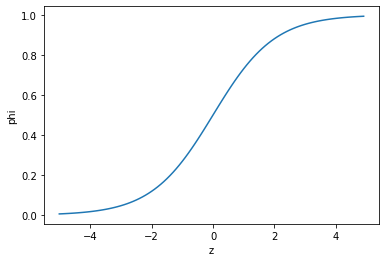

In [19]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
# Selecting two target classes for binary classification
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # overwrite rows with Boolean
train_bream_smelt = train_scaled[bream_smelt_indexes] # Boolean Indexing
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.classes_) # classed ordered alphabetically (index 0 for negative, 1 for positive class)

# Trained Coefficients
print(lr.coef_, lr.intercept_)
print()

# Predict first 5 samples (train)
print(lr.predict(train_bream_smelt[:5]))

# Prediction Probability
proba = lr.predict_proba(train_bream_smelt[:5])
print(np.round(proba, decimals=4))
print()

# z value (predict confident score)
print('Negative class(0) : Bream, Positive class(1) : Smelt')
# if z-value <= 0: negative class; else positive
decision = lr.decision_function(train_bream_smelt[:5])
print(decision)
print()

# Sigmoid
print(expit(decision)) # returns z values of positive class (Smelt(1))

['Bream' 'Smelt']
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.9976 0.0024]
 [0.0274 0.9726]
 [0.9949 0.0051]
 [0.9858 0.0142]
 [0.9977 0.0023]]

Negative class(0) : Bream, Positive class(1) : Smelt
[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### Multiclass Classification ([Softmax function](https://en.wikipedia.org/wiki/Softmax_function))

In [ ]:
# Softmax function
from scipy.special import softmax

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000) #C: Inverse of regularization strength(default 1)
lr.fit(train_scaled, train_target)
print(lr.classes_)

# Trained Coefficients and z values (per class)
print(lr.coef_.shape, lr.intercept_.shape)
print()

# Predict first 5 test samples
print(lr.predict(test_scaled[:5]))

# Prediction Probability
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))
print()

# z values
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))
print()

# Softmax
proba = softmax(decision, axis=1) # calculate softmax along rows(samples)
print(np.round(proba, decimals=3))
print()

# Compare scores (accuracy) from train and test sets
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
(7, 5) (7,)

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]

0.9327731092436975
0.925


### Logistic Loss function (Binary Cross-Entropy Loss Function)

$Cost(h_\theta(x), y)$ ($h_\theta(x)$ is hypothesis(prediction) of linear regression)
- for a single training instance
  - $-log(h_\theta(x))$ if $y = 1$
  - $-log(1 - h_\theta(x))$ if $y = 0$
- As one singule formula: <br>
$Cost(h_\theta(x), y) = -ylog(h_\theta(x) + (1-y)log(1 - h_\theta(x))$
(also known as [Cross-Entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression))
- Binary cross-entropy is often calaulated as the average cross-entropy across all data examples: <br>
$J(\theta) = \frac{1}{m} \sum_{i=1}^m Cost(h_\theta(x), y)$ <br><br>

Further reading:<br>
[Loss Function (Part II): Logistic Regression](https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11) <br>
[Cross-Entropy Loss function](https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e)



### Iris Dataset
- Simple multi-class classification dataset
- 4 Features: sepal and petal length and width
- 150 Iris flowers
- 3 Targets: Three different species (setosa, versicolor, virginica)

In [21]:
from sklearn import datasets

iris = datasets.load_iris() 
print(list(iris.keys()))
print(iris['data'].shape)
print(iris.feature_names)
print(iris['target'].shape)
print(iris.target_names)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150,)
['setosa' 'versicolor' 'virginica']


(1000, 2)
[1.66066066]


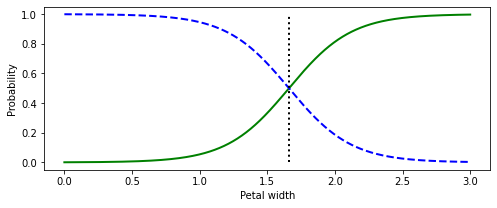

In [24]:
# Build a classifier to detect virginica based on petal width

iris_petal = iris['data'][:, 3:] # petal width
iris_virginica = (iris['target'] == 2).astype(np.int64) # boolean indexing for binary classifier (one vs Rest)

lr = LogisticRegression()
lr.fit(iris_petal, iris_virginica)

# Plot prediction probabilities and decision boundary
x = np.linspace(0, 3, 1000).reshape(-1, 1) # 1000 samples range (0, 3) cm
y_proba = lr.predict_proba(x)
print(y_proba.shape) # (n_samples, n_classes)
decision_boundary = x[y_proba[:, 1] >= 0.5][0]
print(decision_boundary)

plt.figure(figsize=(8, 3))
plt.plot(x, y_proba[:, 1], 'g-', label='Iris Virginica', linewidth=2)
plt.plot(x, y_proba[:, 0], 'b--', label='Not Iris Virginica', linewidth=2)
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', linewidth=2)
plt.xlabel('Petal width')
plt.ylabel('Probability')
plt.show()